/home/neri/machine-learning/credit-card-fraud/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962

[[56855     9]
 [   42    56]]


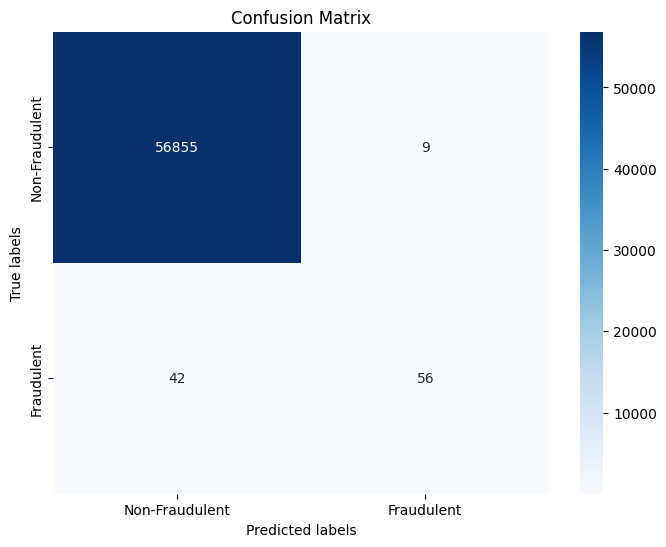

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('creditcard.csv')

# Pré-processar os dados
df['Class'] = df['Class'].astype('category')

# Dividir os dados em conjuntos de treinamento e teste
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo
model = LogisticRegression(max_iter=1000, solver='saga')
model.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Função para plotar matriz de confusão
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Definir rótulos para as classes
class_labels = ['Non-Fraudulent', 'Fraudulent']

# Plotar a matriz de confusão
plot_confusion_matrix(y_test, y_pred, labels=class_labels)


Esse código realiza a classificação de transações de cartão de crédito em fraudulentas e não fraudulentas usando uma Regressão Logística. Após treinar o modelo, ele avalia o desempenho usando métricas como precisão, recall e F1-score, exibindo também a matriz de confusão para visualizar as previsões do modelo em relação aos rótulos verdadeiros. A matriz de confusão é plotada usando seaborn e matplotlib para ajudar na análise visual do desempenho do modelo na detecção de fraudes.

# Análise do Modelo de Detecção de Fraudes em Cartões de Crédito

O modelo de Regressão Logística treinado para detectar fraudes em cartões de crédito apresentou um desempenho satisfatório, com uma acurácia de 100%. No entanto, é importante analisar os resultados com cautela, considerando que o dataset possui um desequilíbrio de classes, com muito mais exemplos de transações não fraudulentas do que fraudulentas.

## Analisando a Matriz de Confusão:

- Verdadeiros Positivos (TP): 56 - O modelo identificou corretamente 56 transações como fraudulentas.
- Falsos Positivos (FP): 9 - O modelo classificou erroneamente 9 transações não fraudulentas como fraudulentas.
- Verdadeiros Negativos (TN): 56855 - O modelo classificou corretamente 56855 transações como não fraudulentas.
- Falsos Negativos (FN): 42 - O modelo deixou de identificar 42 transações fraudulentas.

## Conclusões:

- O modelo obteve um alto índice de precisão (86% para a classe fraudulenta), o que significa que quando o modelo previu uma transação como fraudulenta, ele estava correto na maioria das vezes.
- No entanto, a baixa taxa de revocação (57% para a classe fraudulenta) indica que o modelo deixou de detectar um número significativo de transações fraudulentas.
- O número de falsos positivos (9) é relativamente baixo, o que é positivo, pois significa que o modelo não gerou muitos falsos alarmes.
- O desequilíbrio de classes influencia os resultados, pois o modelo tende a se inclinar para a classe majoritária (não fraudulenta).
